Random Forest Accuracy: 92.36%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       133
           1       0.00      0.00      0.00        11

    accuracy                           0.92       144
   macro avg       0.46      0.50      0.48       144
weighted avg       0.85      0.92      0.89       144


Decision Tree Mean Absolute Error: 0.12
Naive Bayes Accuracy: 92.36%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       133
           1       0.00      0.00      0.00        11

    accuracy                           0.92       144
   macro avg       0.46      0.50      0.48       144
weighted avg       0.85      0.92      0.89       144


K-Nearest Neighbors Accuracy: 91.67%
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

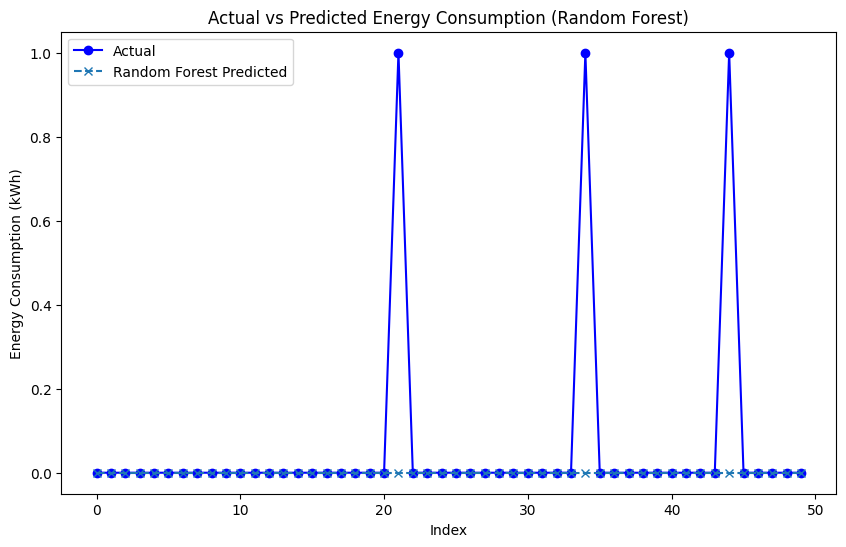

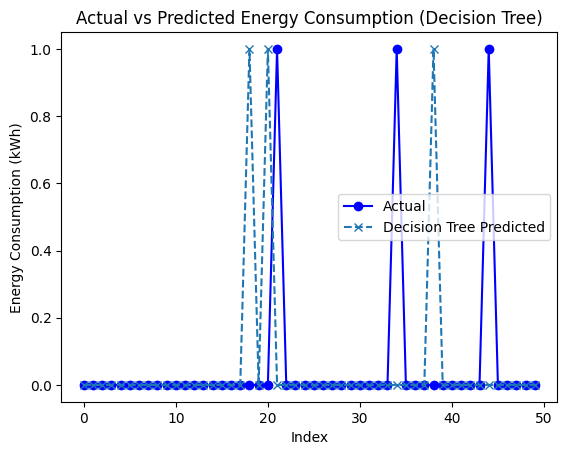

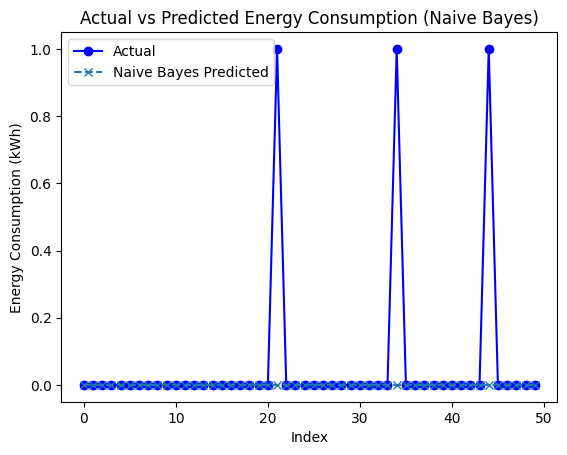

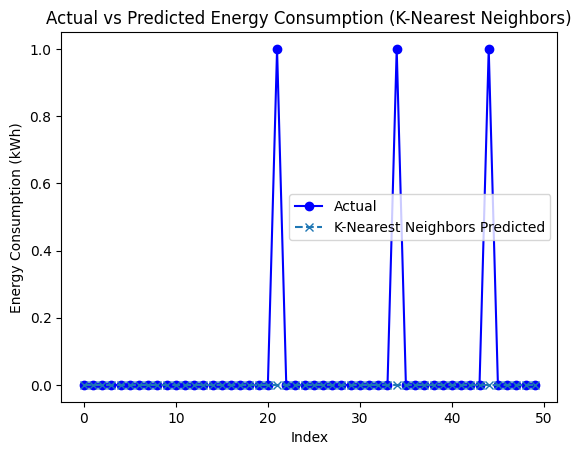

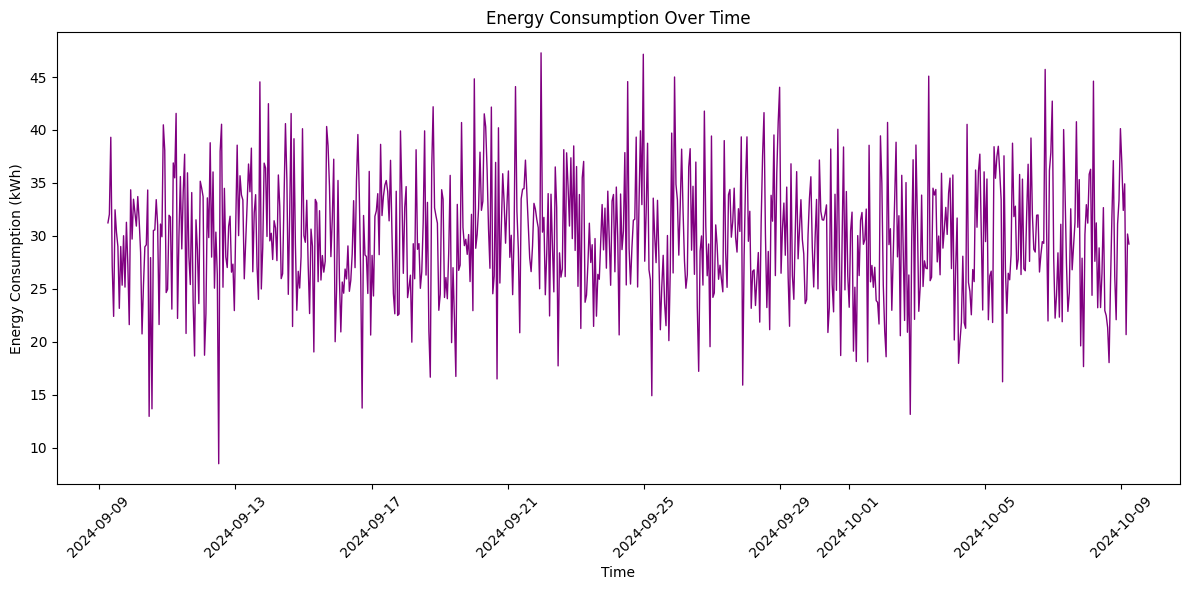

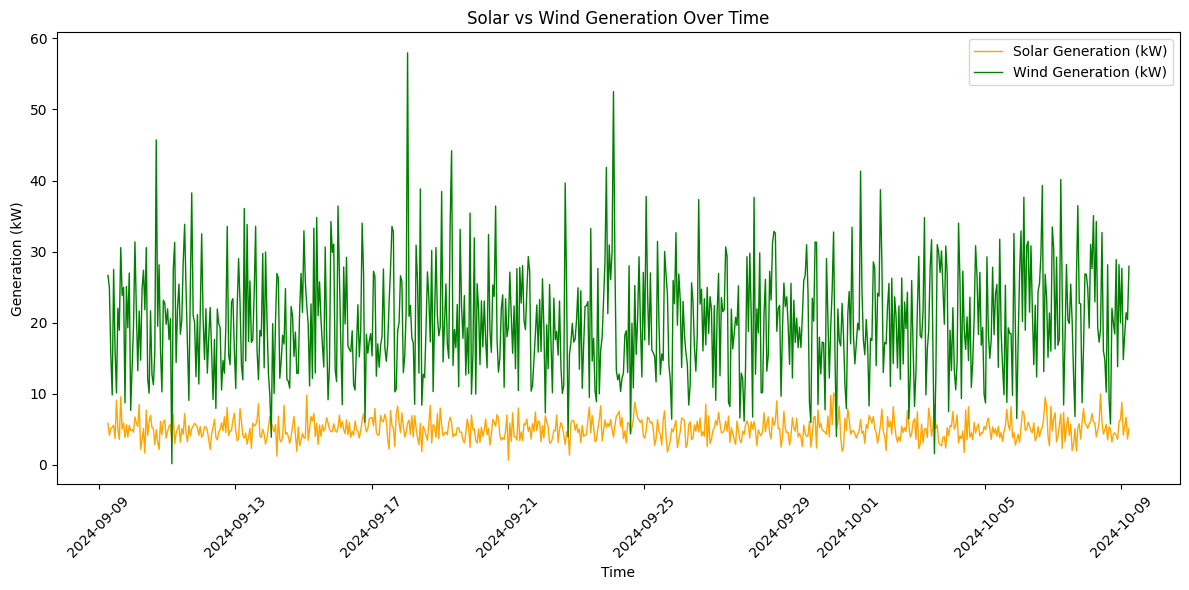

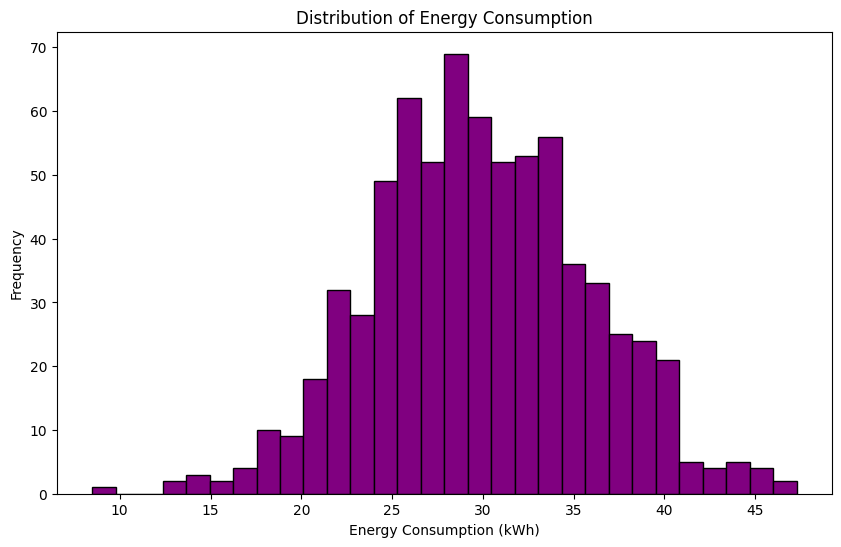

In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df_smart_grid = pd.read_csv('/content/smart_grid_data.csv')  # Adjust path if needed

# Convert 'Timestamp' to datetime format
df_smart_grid['Timestamp'] = pd.to_datetime(df_smart_grid['Timestamp'])

# Feature engineering - Creating time-based features
df_smart_grid['Hour'] = df_smart_grid['Timestamp'].dt.hour
df_smart_grid['Day'] = df_smart_grid['Timestamp'].dt.day
df_smart_grid['Day_of_Week'] = df_smart_grid['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Create interaction term between Temperature and Wind Speed
df_smart_grid['Temp_Wind_Interaction'] = df_smart_grid['Temperature (C)'] * df_smart_grid['Wind Speed (m/s)']

# Select features and target
X = df_smart_grid.drop(columns=['Timestamp', 'Grid Fault (1=Fault)'])
y = df_smart_grid['Grid Fault (1=Fault)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeRegressor(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for KNN
}

# Train and evaluate each model
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

    # Accuracy comparison for classifiers only
    if model_name in ["Random Forest", "Naive Bayes", "K-Nearest Neighbors"]:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

    # Mean Absolute Error for regression models (Decision Tree)
    if model_name == "Decision Tree":
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{model_name} Mean Absolute Error: {mae:.2f}")

    # Classification report for classifiers
    if model_name in ["Random Forest", "Naive Bayes", "K-Nearest Neighbors"]:
        print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Plot: Actual vs Predicted Energy Consumption for each model
plt.figure(figsize=(10, 6))
for model_name, y_pred in predictions.items():
    plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o")  # Only plot first 50 for clarity
    plt.plot(y_pred[:50], label=f"{model_name} Predicted", linestyle="--", marker="x")
    plt.xlabel("Index")
    plt.ylabel("Energy Consumption (kWh)")
    plt.title(f"Actual vs Predicted Energy Consumption ({model_name})")
    plt.legend()
    plt.show()

# Plot: Energy Consumption Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_smart_grid['Timestamp'], df_smart_grid['Energy Consumption (kWh)'], color="purple", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Solar vs Wind Generation Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_smart_grid['Timestamp'], df_smart_grid['Solar Generation (kW)'], color="orange", label="Solar Generation (kW)", linewidth=1)
plt.plot(df_smart_grid['Timestamp'], df_smart_grid['Wind Generation (kW)'], color="green", label="Wind Generation (kW)", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Generation (kW)")
plt.title("Solar vs Wind Generation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Distribution of Energy Consumption
plt.figure(figsize=(10, 6))
plt.hist(df_smart_grid['Energy Consumption (kWh)'], bins=30, color="purple", edgecolor="black")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df_smart_grid = pd.read_csv('/content/smart_grid_data.csv')

# Convert 'Timestamp' to datetime format
df_smart_grid['Timestamp'] = pd.to_datetime(df_smart_grid['Timestamp'])

# Create new time-based features
df_smart_grid['Hour'] = df_smart_grid['Timestamp'].dt.hour
df_smart_grid['Day'] = df_smart_grid['Timestamp'].dt.day
df_smart_grid['Day_of_Week'] = df_smart_grid['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Create interaction terms between weather features and generation data
df_smart_grid['Temp_Wind_Interaction'] = df_smart_grid['Temperature (C)'] * df_smart_grid['Wind Speed (m/s)']

# Choose target and feature columns for classification and regression
classification_target = 'Grid Fault (1=Fault)'
regression_target = 'Energy Consumption (kWh)'

# Classification: Drop unnecessary columns for the classifier
X_classification = df_smart_grid.drop(columns=['Timestamp', classification_target, regression_target])
y_classification = df_smart_grid[classification_target]

# Regression: Drop unnecessary columns for the regressor
X_regression = df_smart_grid.drop(columns=['Timestamp', classification_target, regression_target])
y_regression = df_smart_grid[regression_target]

# Train-test split for both tasks
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeRegressor(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for KNN
}

# Train and evaluate each model
for model_name, model in models.items():
    if model_name in ["Random Forest", "Naive Bayes", "K-Nearest Neighbors"]:
        # Train classifier models on classification data
        model.fit(X_train_class, y_train_class)
        y_pred_class = model.predict(X_test_class)

        # Accuracy and classification report for classifiers
        accuracy = accuracy_score(y_test_class, y_pred_class)
        print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
        print(f"{model_name} Classification Report:\n{classification_report(y_test_class, y_pred_class)}\n")

    elif model_name == "Decision Tree":
        # Train regressor on regression data
        model.fit(X_train_reg, y_train_reg)
        y_pred_reg = model.predict(X_test_reg)

        # Mean Absolute Error for regression model
        mae = mean_absolute_error(y_test_reg, y_pred_reg)
        print(f"{model_name} Mean Absolute Error: {mae:.2f}")
